In [14]:
import numpy as np
import time

start = time.time()

# N_max = 8
# nexp = np.array([2,3,4,5,6,7,8,9])
N_max = 7
nexp = np.array([2,3,4,5,6,7,8])

n = np.zeros(N_max)
sum_up = np.zeros(N_max)
sum_down = np.zeros(N_max)
diff_up = np.zeros(N_max)
diff_down = np.zeros(N_max)
    
sum_exact = np.pi**2/6.0

for i in range(N_max):
    n[i] = 10**nexp[i]
    for j in range(int(n[i])):
        #if ((j+1)%10000000 == 0):
        #    print (i,(j+1))
        sum_up[i] += 1.0/((j+1)**2)
        
    for j in range(int(n[i]),0,-1):
        #if (j%10000000 == 0):
        #    print (i,j)
        sum_down[i] += 1.0/(j**2)
        
    diff_up[i] = sum_exact-sum_up[i];
    print (n[i],sum_up[i],sum_exact-sum_up[i]);
    
    diff_down[i] = sum_exact-sum_down[i];
    print (n[i],sum_down[i],sum_exact-sum_down[i]);
        
end = time.time()
time_taken = end - start
print()
print ("The program took %f seconds to execute" % time_taken)

100.0 1.6349839001848923 0.009950166663334148
100.0 1.634983900184893 0.009950166663333482
1000.0 1.6439345666815615 0.0009995001666649461
1000.0 1.6439345666815597 0.0009995001666667225
10000.0 1.6448340718480652 9.999500016122376e-05
10000.0 1.6448340718480596 9.999500016677487e-05
100000.0 1.6449240668982423 9.999949984074163e-06
100000.0 1.6449240668982263 9.999950000061375e-06
1000000.0 1.64493306684877 9.999994563525405e-07
1000000.0 1.6449330668487263 9.999995000953277e-07
10000000.0 1.6449339668472596 1.0000096684059656e-07
10000000.0 1.6449339668482315 9.99999949513608e-08
100000000.0 1.644934057834575 9.013651380840315e-09
100000000.0 1.6449340568482265 9.99999993922529e-09

The program took 113.508112 seconds to execute


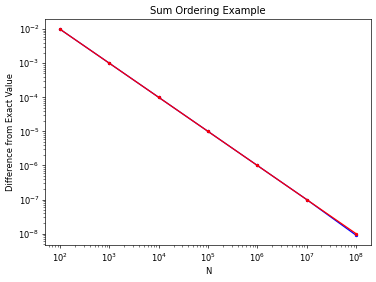

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5), dpi=60)

plt.plot(n,diff_up,"b.-")
plt.plot(n,diff_down,"r.-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Difference from Exact Value")
plt.title("Sum Ordering Example")

plt.show()

C version on jlabdaq:  0.45 seconds

Python loop version on jlabdaq:  113.5 seconds

Factor:  113.5/0.45 = approx. 250 times faster in C !!!!!!!!!!!

In [16]:
start = time.time()
N_max = 7
nexp = np.array([2,3,4,5,6,7,8])

for j in range(N_max):
    n = 10**nexp[j]
    myarray = np.array(n)
    myarray = [1/(i*i) for i in range(1,n+1)]
    print (n,np.sum(myarray),sum_exact-np.sum(myarray))
    myarray = [1/(i*i) for i in range(n,0,-1)]
    print (n,np.sum(myarray),sum_exact-np.sum(myarray))

end = time.time()
time_taken = end - start
print()
print ("The program took %f seconds to execute" % time_taken)

100 1.6349839001848931 0.00995016666333326
100 1.634983900184893 0.009950166663333482
1000 1.6439345666815601 0.0009995001666662784
1000 1.64393456668156 0.0009995001666665004
10000 1.6448340718480603 9.999500016610874e-05
10000 1.6448340718480596 9.999500016677487e-05
100000 1.644924066898227 9.999949999395241e-06
100000 1.6449240668982263 9.999950000061375e-06
1000000 1.6449330668487268 9.999994996512385e-07
1000000 1.644933066848726 9.999995003173723e-07
10000000 1.6449339668482332 9.999999317500397e-08
10000000 1.6449339668482317 9.99999947293162e-08
100000000 1.6449340568482196 1.0000006822608043e-08
100000000 1.6449340568482265 9.99999993922529e-09

The program took 32.621680 seconds to execute
